In [3]:
import pandas as pd
import numpy as np
import seaborn as sns  #과제에 필요한 라이브러리들을 import

In [4]:
titanic = sns.load_dataset('titanic')  #seaborn 라이브러리에서 titanic 데이테셋을 가져옴

In [5]:
titanic.head(5)  #head 함수를 이용해 상위 항목을 불러온다 (숫자 안적으면 기본으로 5개)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.describe()  #describe 함수로 통계 정보 요약
#count : 데이터 개수(결측값 제외)
#mean : 평균
#ste : 표준편차
#min : 최소값
#25% : 하위 25%
#50% : 하위 50%
#75% : 하위 75%
#max : 최대값

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.isnull().sum()  #isnull은 결측치를 True로 출력, sum은 개수를 합쳐서 출력
                        #결측치 제거는 fillna()로 결측치를 다른 값으로 대체하거나, dropna()로 결측치를 제거할 수 있다

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)  #.median() 함수로 'age'의 결측치를 중앙값으로 대체

/var/folders/j9/nrfqzn3s2q349sv0cw_v64vm0000gn/T/ipykernel_3259/2039253766.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)  #.median() 함수로 'age'의 결측치를 중앙값으로 대체


In [15]:
titanic['age'].median()  #'age'의 중앙값은 28

28.0

In [17]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)  #.mode()는 최빈값(가장 많은 빈도로 나타나는 값)을 보여준다. 최빈값이 여러개인 경우 모두 보여주게 되는데, 이때 뒤의[0]은 최빈값으 여러개일 경우 몇번째 최빈값을 보여줄지 적어주는 것

/var/folders/j9/nrfqzn3s2q349sv0cw_v64vm0000gn/T/ipykernel_3259/3304755589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)  #.mode()는 최빈값(가장 많은 빈도로 나타나는 값)을 보여준다. 최빈값이 여러개인 경우 모두 보여주게 되는데, 이때 뒤의[0]은 최빈값으 여러개일 경우 몇번째 최빈값을 보여줄지 적어주는 것


In [19]:
titanic['embarked'].mode()  #최빈값은 S 이고 중복되는 최빈값은 없다

0    S
Name: embarked, dtype: object

In [21]:
titanic['age'].isnull().sum()  #결측치 제거 완료

0

In [23]:
titanic['embarked'].isnull().sum()  #결측치 제거 완료

0

In [27]:
titanic['sex'] = titanic['sex'].replace({'male': 0, 'female': 1})  #map함수로 대체할 값 입력
titanic['alive'] = titanic['alive'].replace({'no': 0 , 'yes': 1})
titanic['embarked'] = titanic['embarked'].replace({'C': 0, 'Q': 1, 'S': 2})

In [29]:
titanic['sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int64

In [31]:
titanic['alive'].head()

0    0
1    1
2    1
3    1
4    0
Name: alive, dtype: int64

In [33]:
titanic['embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int64

In [35]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1  #'family_size'라는 새 컬럼을 만들고 그 값을 정의해준다

In [37]:
titanic['family_size'].head()

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64

In [39]:
#모델 학습에 필요한 데이터 준비 컬럼 여러개 선택 시 [[]] 괄호를 두 개 써야하니 주의
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size']]

In [41]:
X = titanic.drop('survived', axis=1)  #drop함수를 사용해 target할 컬럼인 'surviver' 제거. 'axis=1'은 해당 열 제거. (columns = 'survived') 처럼도 사용할 수 있다. 행 삭제시 axis 적지 않고 사용하면 된다
y = titanic['survived']  #target 설정

In [43]:
#4-2
#Logistic Regression 로지스틱회귀는 종속변수(y)가 이진형일 때(결과값이 2가지 중 하나일 때)사용.각 데이터 포인트가 특정 클래스에 속할 확률을 예측

#데이터 전처리
from sklearn.model_selection import train_test_split  #데이터를 훈련, 테스트로 분할
from sklearn.preprocessing import StandardScaler  #스탠다드스케일러
#까먹고 이 두 개의 import를 입력 안 해주면 바로 에러 발생

#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#전체 데이터의 0.2만큼 테스트에 사용(0.8은 train에 사용), 랜덤 시드 값은 42로 설정(크게 의미없는 숫자. 통일만 시켜주면 된다)

#데이터 스케일링
scaler = StandardScaler()  #평균이 0이고 분산이 1인 정규 분포로 표준화
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
#잊지 말자
from sklearn.linear_model import LogisticRegression  #로지스틱 회귀모델
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #순서대로 정확도 계산(실제 값과 예측 값 비교), 분류 보고서 생성, 혼동 행렬 생성(예측과 실제를 비교하는 표)

#모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)  #모델을 훈련세트로 


#예측
y_pred = model.predict(X_test)  #학습은 train으로 예측은 test로

In [49]:
#평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")  #정확도=(TP+TN)/(TP+TN+FP+FN) 예측한 전체 건수 중 실제와 일치(맞춘) 건수의 비율

Accuracy: 0.8044692737430168


In [55]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")  #분류 보고서
# precision(정밀도) = TP/(TP+FP) 양성이라고 예측한 것 중 실제와 일치하는 비율
#recall(재현율) = TP/(TP+FN) 실제 양성 중 양성이라고 예측한 비율
#f1-score 정밀도와 재현율의 가중 조화평균
#support 각 라벨의 실제 샘플 개수(여기선 0과 1의 개수)
#macro avg 단순 평균
#weighted avg 가중치가 포함된 평균(데이터 개수로 가중평균을 내기 때문에 데이터 개수가 많은 라벨이 유리)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [47]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")  #혼동 행렬(왼쪽 위 부터 TN, FP, FN, TP)

Confusion Matrix:
[[137  20]
 [ 30  81]]


In [54]:
#test_size=0.1 로 한 경우 정확도가 더 올라감(0.1일때>0.3일때>0.2일때)

In [57]:
#4-3
#Random Forest
#랜덤포레스트에 필요한 기능들을 import
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error  #평균제곱오차(실제 값과 예측 값의 차이를 제곱하여 모델의 정확성을 측정)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#데이터 로드
X, y = titanic.drop('survived', axis=1), titanic['survived']

#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
#모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=42)  #100번 반복학습

#모델 학습
model.fit(X_train_scaled, y_train)

#예측
y_pred = model.predict(X_test_scaled)

In [61]:
#평가
mse = mean_squared_error(y_test, y_pred)
print(mse)  #mse값이 0에 가까울수록 예측한 값이 실제 값과 비슷함

0.13605153814540247


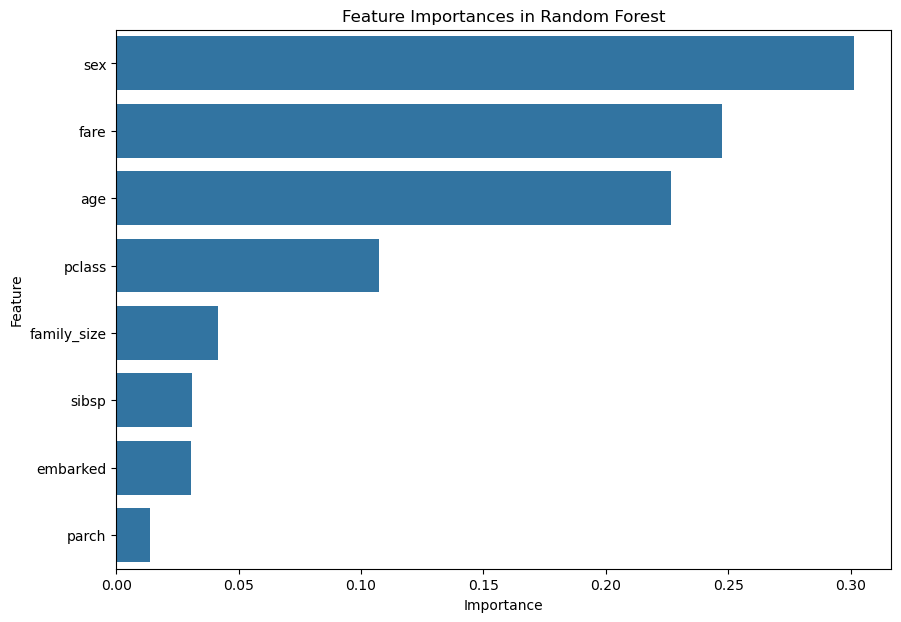

In [62]:
#중요 특성 확인

import matplotlib.pyplot as plt  #시각화 라이브러리(그래프)
import seaborn as sns  #시각화 라이브러리(그래프)

#특성 중요도 추출
feature_importances = model.feature_importances_
#feature가 모델의 예측에 얼마나 중요한 역할을 하는지 나타냄. 값이 클수록 큰 영향을 미침(전체 합은 1)

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

#중요도 순으로 정렬
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 7))  #캔버스의 크기
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)  #barplot 범주형 변수와 연속형 변수의 관계를 그래프로
plt.title('Feature Importances in Random Forest')  #그래프 타이틀 설정
plt.show()

In [64]:
#4-3 
#의사결정나무

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier  #의사결정나무 분류 모델 생성
from sklearn.metrics import accuracy_score, classification_report

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42) 
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.770949720670391
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       105
           1       0.70      0.78      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179



In [73]:
#4-4
#XGBoost

In [71]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [75]:
import xgboost as xgb

In [79]:
#데이터 준비

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X, y = titanic.drop('survived', axis=1), titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
#xgboost 모델 생성
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
#n_estimators 트리의 개수, learning_rate 학습 단계별로 가중치를 얼만큼 사용할지, 또는 이전의 결과를 얼마나 반영할건지 결정
#max_depth 트리의 최대 깊이

# 모델 학습
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost 모델의 MSE: {mse_xgb}')

XGBoost 모델의 MSE: 0.12981004899201257
